# **A* Search**

N-Puzzle or sliding puzzle is a popular puzzle that consists of N tiles where N can be 8, 15, 24, and so on. In our example N = 8. The puzzle is divided into $\sqrt{N+1}$ rows and $\sqrt{N+1}$ columns. Eg. 15-Puzzle will have 4 rows and 4 columns and an 8-Puzzle will have 3 rows and 3 columns. The puzzle consists of N tiles and one empty space where the tiles can be moved. Start and Goal configurations (also called state) of the puzzle are provided. The puzzle can be solved by moving the tiles one by one in the single empty space and thus achieving the Goal configuration.

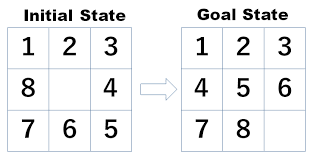

The solution to the N-puzzle problem using Uniform Cost Search algorithm is given below. The output of this code shows how many iterations does it take for the UCS algorithm to solve the problem. Your task is to understand the UCS solution and modify it to solve the N-puzzle problem using A* search algorithm.


In [ ]:
### Run this cell ###
from heapq import heapify, heappop, heappush
import copy

class State:
  def __init__(self, grid):
    self.grid = []
    for row in grid:
      self.grid.append(row)
    self.dim = len(grid)
  def __lt__(self, other):
    return False
  def __eq__(self, other):
    for row in range(self.dim):
      for cell in range(self.dim):
        if self.grid[row][cell] != other.grid[row][cell]:
          return False
    return True
  def __hash__(self):
    hash = 0
    prod = 1
    for row in range(self.dim):
      for cell in range(self.dim):
        hash += ord(self.grid[row][cell])*prod
        prod*=2
    return hash
  def getNeighbors(self):
    x, y = self.findCell('_')
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    neighbors = []
    for direction in directions:
      neighbor = self.move(x, y, x+direction[0], y+direction[1])
      if neighbor is not None:
        neighbors.append(neighbor)
    return neighbors
  def move(self, x1, y1, x2, y2):
    child = copy.deepcopy(self)
    if x2 >= 0 and x2 < self.dim and y2 >= 0 and y2 < self.dim:
      temp = child.grid[x1][y1]
      child.grid[x1][y1] = child.grid[x2][y2]
      child.grid[x2][y2] = temp
      return child
    return None
  def findCell(self, c):
    for i in range(self.dim):
      for j in range(self.dim):
        if self.grid[i][j] == c:
          return i, j
    return None
  def __str__(self):
    s = ""
    for i in range(self.dim):
      s += " ".join(self.grid[i])
      s += "" if i == self.dim - 1 else "\n"
    return s

In [ ]:
### Comment out every initial states except one to run that test case. The last test case is the hardest one. It may take some time to solve the puzzle. ###

INITIAL = State([
    ['1', '2', '3'],
    ['_', '4', '6'],
    ['7', '5', '8']
])
# INITIAL = State([
#     ['_', '1', '2'],
#     ['4', '5', '3'],
#     ['7', '8', '6']
# ])
# INITIAL = State([
#     ['1', '_', '3'],
#     ['4', '2', '6'],
#     ['7', '5', '8']
# ])
# INITIAL = State([
#     ['8', '_', '6'],
#     ['5', '4', '7'],
#     ['2', '3', '1']
# ])

GOAL = State([
    ['1', '2', '3'],
    ['4', '5', '6'],
    ['7', '8', '_']
])



visited = set()
parent = {INITIAL: None}
pq = [(0, INITIAL, 0)]
heapify(pq)
while pq:
  cost, current, steps_from_source = heappop(pq)
  if current in visited:
    continue
  if current == GOAL:
    break
  visited.add(current)
  neighbors = current.getNeighbors()
  for neighbor in neighbors:
    if neighbor not in visited:
      parent[neighbor] = current
      cost = steps_from_source + 1
      heappush(pq, (cost, neighbor, steps_from_source + 1))

print(f"Number of states visited: {len(visited)}")

# Back track path
current = GOAL
trace_state = []
while current:
  trace_state.append(current)
  current = parent[current]

# Print path
for i in range(len(trace_state)-1, -1, -1):
  print(trace_state[i])
  if i != 0:
    print("  | \n \\\'/ ")


Number of states visited: 18
1 2 3
_ 4 6
7 5 8
  | 
 \'/ 
1 2 3
4 _ 6
7 5 8
  | 
 \'/ 
1 2 3
4 5 6
7 _ 8
  | 
 \'/ 
1 2 3
4 5 6
7 8 _


In [ ]:
''' Modify the above code to implement A* search algorithm.
You can use state.grid to access the puzzle board and state.findCell() to find the position of any cell in the puzzle board.
For example for the first test-case INITIAL.findCell('4') will return 1 1. '''
### CODE HERE ###

from heapq import heapify, heappop, heappush
import copy

class State:
    def __init__(self, grid):
        self.grid = []
        for row in grid:
            self.grid.append(row)
        self.dim = len(grid)
    def __lt__(self, other):
        return False
    def __eq__(self, other):
        for row in range(self.dim):
            for cell in range(self.dim):
                if self.grid[row][cell] != other.grid[row][cell]:
                    return False
        return True
    def __hash__(self):
        hash = 0
        prod = 1
        for row in range(self.dim):
            for cell in range(self.dim):
                hash += ord(self.grid[row][cell]) * prod
                prod *= 2
        return hash
    def getNeighbors(self):
        x, y = self.findCell('_')
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        neighbors = []
        for direction in directions:
            neighbor = self.move(x, y, x + direction[0], y + direction[1])
            if neighbor is not None:
                neighbors.append(neighbor)
        return neighbors
    def move(self, x1, y1, x2, y2):
        child = copy.deepcopy(self)
        if x2 >= 0 and x2 < self.dim and y2 >= 0 and y2 < self.dim:
            temp = child.grid[x1][y1]
            child.grid[x1][y1] = child.grid[x2][y2]
            child.grid[x2][y2] = temp
            return child
        return None
    def findCell(self, c):
        for i in range(self.dim):
            for j in range(self.dim):
                if self.grid[i][j] == c:
                    return i, j
        return None
    def __str__(self):
        s = ""
        for i in range(self.dim):
            s += " ".join(self.grid[i])
            s += "" if i == self.dim - 1 else "\n"
        return s

def manhattan_distance(state, goal):
    distance = 0
    for i in range(state.dim):
        for j in range(state.dim):
            if state.grid[i][j] != '_' and state.grid[i][j] != goal.grid[i][j]:
                x_goal, y_goal = goal.findCell(state.grid[i][j])
                distance += abs(x_goal - i) + abs(y_goal - j)
    return distance



# INITIAL = State([
#     ['1', '2', '3'],
#     ['_', '4', '6'],
#     ['7', '5', '8']
# ])
# INITIAL = State([
#     ['_', '1', '2'],
#     ['4', '5', '3'],
#     ['7', '8', '6']
# ])
# INITIAL = State([
#     ['1', '_', '3'],
#     ['4', '2', '6'],
#     ['7', '5', '8']
# ])
INITIAL = State([
    ['8', '_', '6'],
    ['5', '4', '7'],
    ['2', '3', '1']
])

GOAL = State([
    ['1', '2', '3'],
    ['4', '5', '6'],
    ['7', '8', '_']
])

visited = set()
parent = {INITIAL: None}
pq = [(manhattan_distance(INITIAL, GOAL), INITIAL, 0)]
heapify(pq)
while pq:
    f_cost, current, steps_from_source = heappop(pq)
    if current in visited:
        continue
    if current == GOAL:
        break
    visited.add(current)
    neighbors = current.getNeighbors()
    for neighbor in neighbors:
        if neighbor not in visited:
            parent[neighbor] = current
            g_cost = steps_from_source + 1
            h_cost = manhattan_distance(neighbor, GOAL)
            heappush(pq, (g_cost + h_cost, neighbor, g_cost))

print(f"Number of states visited: {len(visited)}")

# Back track path
current = GOAL
trace_state = []
while current:
    trace_state.append(current)
    current = parent[current]

# Print path
for i in range(len(trace_state)-1, -1, -1):
    print(trace_state[i])
    if i != 0:
        print("  | \n \\\'/ ")




Number of states visited: 3064
8 _ 6
5 4 7
2 3 1
  | 
 \'/ 
_ 8 6
5 4 7
2 3 1
  | 
 \'/ 
5 8 6
_ 4 7
2 3 1
  | 
 \'/ 
5 8 6
4 _ 7
2 3 1
  | 
 \'/ 
5 _ 6
4 8 7
2 3 1
  | 
 \'/ 
_ 5 6
4 8 7
2 3 1
  | 
 \'/ 
4 5 6
_ 8 7
2 3 1
  | 
 \'/ 
4 5 6
8 _ 7
2 3 1
  | 
 \'/ 
4 5 6
8 3 7
2 _ 1
  | 
 \'/ 
4 5 6
8 3 7
2 1 _
  | 
 \'/ 
4 5 6
8 3 _
2 1 7
  | 
 \'/ 
4 5 _
8 3 6
2 1 7
  | 
 \'/ 
4 _ 5
8 3 6
2 1 7
  | 
 \'/ 
4 3 5
8 _ 6
2 1 7
  | 
 \'/ 
4 3 5
8 1 6
2 _ 7
  | 
 \'/ 
4 3 5
8 1 6
2 7 _
  | 
 \'/ 
4 3 5
8 1 _
2 7 6
  | 
 \'/ 
4 3 _
8 1 5
2 7 6
  | 
 \'/ 
4 _ 3
8 1 5
2 7 6
  | 
 \'/ 
4 1 3
8 _ 5
2 7 6
  | 
 \'/ 
4 1 3
_ 8 5
2 7 6
  | 
 \'/ 
4 1 3
2 8 5
_ 7 6
  | 
 \'/ 
4 1 3
2 8 5
7 _ 6
  | 
 \'/ 
4 1 3
2 _ 5
7 8 6
  | 
 \'/ 
4 1 3
_ 2 5
7 8 6
  | 
 \'/ 
_ 1 3
4 2 5
7 8 6
  | 
 \'/ 
1 _ 3
4 2 5
7 8 6
  | 
 \'/ 
1 2 3
4 _ 5
7 8 6
  | 
 \'/ 
1 2 3
4 5 _
7 8 6
  | 
 \'/ 
1 2 3
4 5 6
7 8 _


# **KNN**

Dataset: [https://drive.google.com/file/d/1hiKmoSq_wqqQovNwpg6yV-8H0cg4jDtO/view?usp=sharing](https://)

Given the dataset you need to detect whether a student with certain record is from section A or section B.

Normalize data using: $\frac{x-x_{min}}{range}$

In [ ]:
### Run this cell. You can't import anything else
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
### If you are using google colab, upload the csv file.
### Then remove None from the code below and read the csv file from the correct path.
### This cell should show the first 5 columns of the dataframe
df = pd.read_csv('dataset.csv')
df.head()

,Roll,Assignment-1,Assignment-2,Assignment-3,Assignment-4,Assignment-5,Final,Mid,Section
0,11123071,5,4,7,7,7,35,5,B
1,11152024,1,5,2,15,14,14,23,B
2,11152195,9,14,12,11,8,13,3,B
3,11161135,6,9,7,10,5,60,5,A
4,11162067,10,12,9,9,12,50,11,A


In [ ]:
### Split the dataset into data and label. You may not want to use every feature as data.
### For the third statement use the train_test_split function to split the dataset into training(80%) and testing(20%)
### Set random_state=0

X = df.drop(columns=['Section'])
y = df['Section']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
### Normalize the data.
### Hint: Get x_min and range from the training data. Use that to normalize both training and testing data.
# Normalize the data
X_train_min = X_train.min()
X_train_range = X_train.max() - X_train.min()

X_train = (X_train - X_train_min) / X_train_range
X_test = (X_test - X_train_min) / X_train_range




In [77]:
### Choose a suitable value for k
### implement the euclidean function which should return the euclidean distance between a test data vector and a train data vector.
import numpy as np

k = 3

def euclidean(test_data, train_data):
    distance = np.sqrt(np.sum((test_data - train_data) ** 2))
    return distance

def mode(distances):
    labels = {
        'A': 0,
        'B': 0
    }
    for t in distances:
        labels[t[1]] += 1
    return 'A' if labels['A'] > labels['B'] else 'B'

y_pred = {}
for i, row_test in X_test.iterrows():
    distances = []
    for j, row_train in X_train.iterrows():
        distances.append((euclidean(row_test, row_train), y_train[j]))
    distances.sort()
    label = mode(distances[:k])
    y_pred[i] = label

print(y_pred)
print(dict(y_test))


{29: 'A', 20: 'A', 16: 'A', 28: 'B', 22: 'A', 15: 'B', 10: 'B'}
{29: 'A', 20: 'B', 16: 'A', 28: 'B', 22: 'A', 15: 'B', 10: 'B'}


In [78]:
### Compare between y_pred and y_test and print the accuracy
# Compare between y_pred and y_test and print the accuracy
y_pred_list = [y_pred[i] for i in y_test.index]
y_test_list = y_test.tolist()


correct_predictions = sum(1 for yp, yt in zip(y_pred_list, y_test_list) if yp == yt)
accuracy = correct_predictions / len(y_test_list)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 85.71%
